In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file into a pandas DataFrame
df1 = pd.read_csv('data_prabowo1.csv')
df2 = pd.read_csv('data_prabowo2.csv')
df3 = pd.read_csv('data_prabowo3.csv')

df_prabowo = [df3, df2, df1]
df_prabowo = pd.concat(df_prabowo, ignore_index=True)
df_prabowo

# Display the DataFrame
data_prabowo = df_prabowo[['full_text','sentimen']]
data_prabowo

,full_text,sentimen
0,@bdjkdkdgnd @griselruiz88 @jokowi @prabowo @gi...,NaN
1,@yozariam Wakakaka geli anjer Bikin prabowo g...,NaN
2,Pendukung Ganjar dan AMIN Beralih ke Prabowo-G...,positif
3,Melki Laka Lena Tegaskan Penyusunan RUU Keseha...,NaN
4,@TeddGus @prabowo @gibran_tweet Dari dulukan l...,NaN
...,...,...
2326,@fadlizon @prabowo @gibran_tweet Iya satu puta...,negatif
2327,Dengan Prabowo dan Gibran di pucuk kepemimpina...,positif
2328,"@TsamaraDKI Naaah, mulai muncul tukang cebok. ...",negatif
2329,@adearmando61 Yg panik lo ade Armando kekalaha...,negatif


### Bersihkan Data

In [3]:
# melihat dan Hapus data yang kosong
data_prabowo.isnull().sum()

full_text       0
sentimen     1213
dtype: int64

In [4]:
data_prabowo.shape

(2331, 2)

In [5]:
data_prabowo = data_prabowo.dropna()

In [6]:
data_prabowo.shape

(1118, 2)

In [7]:
# melihat data yang duplicate dan menghapusnya
data_prabowo.duplicated().sum()

48

In [8]:
data_prabowo = data_prabowo.drop_duplicates()

In [9]:
data_prabowo.duplicated().sum()

0

In [10]:
data_prabowo.shape

(1070, 2)

In [11]:
# fungsi menghapus karakter khusus
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

data_prabowo['full_text'] = data_prabowo['full_text'].apply(clean_twitter_text)

In [12]:
# melihat data yang sama lagi
data_prabowo.duplicated().sum()

17

In [13]:
data_prabowo = data_prabowo.drop_duplicates()

In [14]:
data_prabowo.duplicated().sum()

0

In [15]:
data_prabowo.shape

(1053, 2)

In [16]:
data_prabowo

,full_text,sentimen
2,Pendukung Ganjar dan AMIN Beralih ke PrabowoGi...,positif
5,Indonesia membutuhkan pemimpin yang berani dan...,positif
6,Saya yakin Prabowo dan Gibran akan membawa per...,positif
7,Prabowo dan Gibran teruslah berjuang demi Indo...,positif
8,Ini baru namanya kampanye sangat kreatif bukan...,positif
...,...,...
2324,tidak akan berubah tetap amin,negatif
2326,Iya satu putaran buat paslon lain bukan untuk ...,negatif
2328,Naaah mulai muncul tukang cebok belum capek ya...,negatif
2329,Yg panik lo ade Armando kekalahan Prabowo sema...,negatif


In [17]:
perwakilan_data1 = data_prabowo.loc[data_prabowo['full_text']=='Dukungan trus mengalir untuk prabowo gibran semakin kuat']
perwakilan_data2 = data_prabowo.loc[data_prabowo['full_text']=='Tetap kita dukung prabowo gibran']
perwakilan_data3 = data_prabowo.loc[data_prabowo['full_text']=='Kita mendukung untuk prabowo gibran']
perwakilan_data4 = data_prabowo.loc[data_prabowo['full_text']=='Ngeri tkut main curang kaya 2019']
perwakilan_data5 = data_prabowo.loc[data_prabowo['full_text']=='Lah sekarang juga udah keliatan curangnya']
perwakilan_data6 = data_prabowo.loc[data_prabowo['full_text']=='Klo dipaksa satu putaran dengan kecurangan ya tambah ricuh suasana']

In [18]:
perwakilan_data1

,full_text,sentimen
590,Dukungan trus mengalir untuk prabowo gibran se...,positif


In [19]:
perwakilan_data2

,full_text,sentimen
521,Tetap kita dukung prabowo gibran,positif


In [20]:
perwakilan_data3

,full_text,sentimen
516,Kita mendukung untuk prabowo gibran,positif


In [21]:
perwakilan_data4

,full_text,sentimen
640,Ngeri tkut main curang kaya 2019,negatif


In [22]:
perwakilan_data5

,full_text,sentimen
1932,Lah sekarang juga udah keliatan curangnya,negatif


In [23]:
perwakilan_data6

,full_text,sentimen
1894,Klo dipaksa satu putaran dengan kecurangan ya ...,negatif


# Preprocessing Text

### 1. Case Folding

In [24]:
# Mengubah kata Huruf besar menjadi huruf kecil
data_prabowo['full_text'] = data_prabowo['full_text'].str.lower()
data_prabowo

,full_text,sentimen
2,pendukung ganjar dan amin beralih ke prabowogi...,positif
5,indonesia membutuhkan pemimpin yang berani dan...,positif
6,saya yakin prabowo dan gibran akan membawa per...,positif
7,prabowo dan gibran teruslah berjuang demi indo...,positif
8,ini baru namanya kampanye sangat kreatif bukan...,positif
...,...,...
2324,tidak akan berubah tetap amin,negatif
2326,iya satu putaran buat paslon lain bukan untuk ...,negatif
2328,naaah mulai muncul tukang cebok belum capek ya...,negatif
2329,yg panik lo ade armando kekalahan prabowo sema...,negatif


In [25]:
data_prabowo.shape

(1053, 2)

### 2. Stopword

In [26]:
# Menghilangkan kata-kata yang tidak memilki bobot
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_word = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_word)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

data_prabowo['full_text'] = data_prabowo['full_text'].apply(lambda x: stopword(x))
data_prabowo

,full_text,sentimen
2,pendukung ganjar amin beralih prabowogibran si...,positif
5,indonesia membutuhkan pemimpin berani kuat pil...,positif
6,yakin prabowo gibran membawa perubahan positif...,positif
7,prabowo gibran teruslah berjuang indonesia leb...,positif
8,baru namanya kampanye sangat kreatif bukan men...,positif
...,...,...
2324,akan berubah tetap amin,negatif
2326,iya satu putaran buat paslon bukan pasangan,negatif
2328,naaah mulai muncul tukang cebok capek nyebokin...,negatif
2329,yg panik lo ade armando kekalahan prabowo sema...,negatif


### 3. Normalisasi

In [27]:
# Mengubah kata singkat menjadi normal
norm = {'sy':'saya','tau':'tahu','perubahancoblos':'perubahan coblos','utk':'untuk',
        'yg':'yang','org':'orang','pd':'pada','ganjar':'','mahfud':'','prabowo':'',
        'gibran':'','anis':'','muhaimin':'','trus':'terus','tkut':'takut','amin':'',
        'yang':'','pak':''}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

data_prabowo['full_text'] = data_prabowo['full_text'].apply(lambda x:normalisasi(x))
data_prabowo

,full_text,sentimen
2,pendukung beralih siap menangkan satu putaran,positif
5,indonesia membutuhkan pemimpin berani kuat pil...,positif
6,yakin membawa perubahan positif pilih02,positif
7,teruslah berjuang indonesia lebih baik pilih02,positif
8,baru namanya kampanye sangat kreatif bukan men...,positif
...,...,...
2324,akan berubah tetap,negatif
2326,iya satu putaran buat paslon bukan pasangan,negatif
2328,naaah mulai muncul tukang cebok capek nyebokin...,negatif
2329,panik lo ade armando kekalahan semakin jelas...,negatif


### 4. Tokenizing

In [28]:
# Memisahkan kata dalam suatu kalimat
tokenized = data_prabowo['full_text'].apply(lambda x:x.split())
tokenized

2       [pendukung, beralih, siap, menangkan, satu, pu...
5       [indonesia, membutuhkan, pemimpin, berani, kua...
6           [yakin, membawa, perubahan, positif, pilih02]
7       [teruslah, berjuang, indonesia, lebih, baik, p...
8       [baru, namanya, kampanye, sangat, kreatif, buk...
                              ...                        
2324                               [akan, berubah, tetap]
2326    [iya, satu, putaran, buat, paslon, bukan, pasa...
2328    [naaah, mulai, muncul, tukang, cebok, capek, n...
2329    [panik, lo, ade, armando, kekalahan, semakin, ...
2330    [calon, gelandangan, politik, bila, kalah, jad...
Name: full_text, Length: 1053, dtype: object

### 5. Stemming

In [29]:
# Mengubah kata imbuhan menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

dukung alih siap menang satu putar
indonesia butuh pimpin berani kuat pilih02 jawab pilih02
yakin bawa ubah positif pilih02
terus juang indonesia lebih baik pilih02
baru nama kampanye sangat kreatif bukan jatuh lawan keren nih 02 emng gada lawan
dukung upaya untuk pimpin indonesia tuju makmur pilih02
terus juang pilih02 percaya kalian pilih02
biar tua paling milik prestasi track record baik
rawan pragib 2024 deklarasi dukung detiknews
terus lanjuntukan bangun ikn sama
foto memang g hubung langsung sama foto ingat bejat putus 90 balik proses reformasi raih korban besar lahir cawapres lewat putus bejat
makin yakin bawa ubah lewat ikb
keren kreatif banget jadi mudah ingat pokok mantap
ikn lebih kembang baik sama
dukung 02 playing victim fokus menang
milik program sangat luar biasa lohh pikir baik rakyat indonesia
tetapi jumawa sibuk urus calon ketawa guee mah
yaaa wajar lah klu bu khofifah tentu pilih dia jga punya nilai plus sendiri n
siap terus bangun ikn sukses
tetap optimis menang sat

harap generasi masa depan pilih02 kita dukung pilih02
tetap jokowi baik presiden amp wakil presiden
bersamasama bangun masa depan indonesia lebih baik pilih02
karna segi fisik tdk mungkin jadwal padat pelosok daerah daerah seluruh indonesia lawat keluar negeri msh terlalu muda blm alam cukup untuk ganti beliau mangkat
sukses selalu
besar hrpan depan ketemu mas 02 menang
semangat mantab nih balihony
pilih rukun damai sejahtera kerap menang survei alas nilai menang pilpres 2024 satu putar
moga kamu punya anak turun bpk mas karna dua idola kamu
rawan bocahe komitmen dukung halo semarang
airlangga pede raup 65 suara ntt
hebat a0madhinka0 aniesbaswedana0 cakiminowa0 a0 tweet a0 bersih kuatkankpk sikatkorupsi hebat a0 mohmd
wah balik sama keluarga aku dulu malah puja jokowi sekarang sadar jokowi gak baik cuma aku sama ibu kakakkakak awal gak suka malah mau nyoblos 02 karna kata saking suka sama jokowi kalau ba malah fix golput
rakyat suruh main game makan siang gratis entah mau bawa nih nega

apa tetap pilih baik
indonesia jangan gak nyoblos
dengar perspektif tkn beri wawas tambah dinamika politik mungkin jadi
ayoo junjung tinggi nilai nasionalisme moral etika negara no money politics no money politics no money politics pilih nomor1
fakta banyak rawan pindah haluan rapat dukung ayah krna baik dhe btw uda bantu warga turun lingkung kampanye 1 putar stop hoax
indonesia butuh pimpin kuat berani wis wayahe 08 dadi presiden ri 8
ttp kuat kokoh tak bendung meski digo banyak isu
mas gaskeun memang satu putar
hadir konsolidasi demokrat sulsel ahy beri instruksi menang ms agusayaudhoyono padaemokrat sama ahy
kecewa tambah lihat ketidakmampuan yakin rakyat denga program tawar
sangat kecewa lihat beri solusi masalah hadap negara
kawal menang peabowo
siap menang satu putar nyala
harap calon presiden lebih sekadar wajah baru buat kecewa ketidakmampuan dalam presentasi rencana nyata maju negara
satu awal pimpin baik kita
gema acara harlah 78 muslimat nu surabaya insayaa alloh menang
kece

bu mega oke ngedukung paslon nomor 2
logika aja orang rekam jejak prestasi ga liat modal jogad joged doank kok hasil besarsementara ajak dialog banyak prestasi malah rendah bukti saat milu gak usah giring2 opini masayaarakat
kalau nyata hasil suapa putar pertama ga 45 persen lebih arti lembaga surveynya bayar jangan percaya sama lembaga survei
moga rekonsiliasi segera wujud
lembaga2 survey ngomong elektabilitas jauh bawah ditandain
gw siap menangin
ledak 01
udah tinggal joged joged aja gak usah capek capek debat kampanye gak usah capek bikin opini nyebarin hasil survey ting
kalau jokowi rujuk padaip tanda ialah menang mutlak paslon nomor urut 2
luar biasa satu putar tuju indonesia emas
kelit sekali ente dukung ente sama dari hati seperti ente dendam sama yaa
insha allah apa narasi engkau bikin
bu mega orang realisitis realistis kalau sama nomor urut 2
tegas penting fasilitas sehat jadi benteng tahan nasional prokal
sama elektabilitasnya nyungsep banget mending
kalau sampe satu putar lu

rawan ngamuk gak bagi duit heheheparah nih
ente gak akhlak
uang memang m gurih jenderal
gak usah satu putar sekali aja lantik akhir januari beres bhuahahahahahahahahahahahahaha
gak usah ribet2 ai adopsi asing greenflation visi program jelasbahaya bikin rakyat indonesia bayar harga inflasi pangan aja pangan impor malah gencar untuk bbm indosat tulalit tissa biani
tdk pernah nyaleg sama2 mantan pimpin komisi gus ken nyaleg nam jelas jiwa ganggu
halu
tolak aja kalau anies kalah gak usah terusterusan stuck coba lihat lain misal
kaesang tum psi minta warga bandung pilih menang sekali putar
skip deh terlalu banyak omong doang kayak kurang paham mood aspirasi masayaarakat udah jelas paslon 01
bakal inisiasi uu lindung hewan menang pilpres 2024
tolak aja kalau anies kalah gak usah terburuburu mending pilih lanjut
main catur kalau raja gerak kesana kemari tanda nya kalah nanti depan tandatanda hasil survey angin surga belaka
anehmakin tambah atur ndak lama satpol pp mumet nganggkutin becak nong

kandidat kelas dunia kampanye konser band kelas dunia teknik video drone kelas dunia pimpin indonesia pasuk kelas dunia
mantap maju terus
lewat masa produktif bak buah di karbit alias disa mateng hingga alami busuk dini
aja dulu ada ubah
pilih psi indonesia lepas landas
harus bener bener hemat ayo dukung
tri bukan asn clear lagi ente ga ributin itu mdwkwkwkwkwk
klo pilih belakang jokowidodo insting misal jadi presiden gak lama jadi otomatis naik jadi presiden nya
liput 6 menang nomer satungedabrus ja
ngtweet harus check dulu otak rai tidakitu
dukung emakemak difabel tkn makin yakin menang satu putar
ikut sandera ini
haduh haduh dah paling benar tuh dukung
yaallah jauh lah masayaarakat indo dr bencana pimpin negeri
lah iya mereka bilang mau melanjuntukan perlu tanya lah bener aja salah mau dilanjuntukan
anak muda pasti pilih untuk indonesia lebih maju menang qatar china salma naruto tom cabut boruto gen z el sulfat anies
milu skrg parah bgt uang rakyat guna untuk golong tentu raja banya

bakal gagal menang satu putar memed dah mulai stress sampe ngarang cerita hoaxs kyak ginimkmkmkmk
gilaa wkwkkw inti balas kubu olok pa pas debat 3 tuju sekali biar imbang lah no 1 3 mulai
goblok teddy gue benar konstituen elo sanya elo tolol parah
gak tahu malu lu bangga jadi leceh demokrasi
tuh debat kaya anak kecil gak ngontrol diri
siplg yakin calon bs maju indo
mending pilih tahu tata krama debat aja lewat jadi pimpin
gimana percaya sama debat aja kayak acara pamer egois
mending cari punya etika debat biar negara nggak malu
penting jangan 1 bagus 3
masuk akal deh milih jadi presidenwakil presiden debat aja gak sopan
terima krn apa krn amplop wkwkk
mas jaga mulut2 jahat sakit asa aku sedih niat baik pimpin negara makmur rakyat kenapa banyak sekali benci dia memang salah beliau dmn dunia jahat pada
ga punya etika
ahy ingat kader demokrat ntb menang pilpres 2024 bkc agusayaudhoyono padaemokrat demokrat solid
sehatsehat terus indonesia butuh ba mas pimpin bangsa iniagar dgn tenang lepa

loh kok ngatur anies sama ga etika sama lebih tua mana ngritik e data salah gmana sih kok contek salah kaprah
mantap solidaritas duduk mas makin kesini makin kuat
hasil survei sejak 2004 bukti mereka tdk jauh hasil pilih benar tenang paslon 02 menang mau satu putar atahupun putar elu kejang2 lama 5 tahun depan
erick orang cerdas tentu kenapa dukung orang level iq jongkok jadi wakl presiden 250jt rakyat indonesia
ini kata fh segera sangka kalau paslon 02 kalah kasus bumn banyak nanti
4x debat alam tunjuk pasang gaberes rubah batas usia jadi cawapres singgung ngamuk jujur kredit macet tidak sopan kpada prof masih pilih
klo disa satu putar curang tambah ricuh suasana
masayaa allah luar biasa dahsayaat sambutab warga masayaarakat sambut
asal bukan

siap kalau timnas pulang piala asia jangan lupa ajak foto sama 02
lacur politik nyata
dukung terus alir gak pilhan selain
1000 rawan bolone mase makin mantap dukung menang satu putar
haha anak presiden songong bagong salam karma buat ipar ga pun

kalau otak sdh terkontasi benci thd 02 tdk hilang lupa waktu debat capres rendah cawapres 01 03 kerupuk siram air hadap
kalau gw jadi lo mending mundur gerindra zon sungguh malu
definisi kaya raya babu
emang susah ni dukung 02 serang data dulu jg tanya jokowi pilpres 2019 lah nyerang e gimmick anak orang kaya songong orang lbh tua
p anies p nyerang e data ga jawabpendukungnya nangis2 ngamuk2sementara nyerang e gesture kalimat2 rendah profpadahl jelas prof dah bener ngawurseakan2 pinter
zonlu gak malu baca reply2 tweet lu
coba bain kalo begitu debat sama udah dikatain apaya
gua ramall 2024 jadi presiden tanda ni ramal gua
sih bocil cocok sperti dan blm cocok bawa negara untuk buat main2 jd naruto kan lindung kejahatan2 dr konstitusi betul ngak
lihat mampu debat cak imin sdh sekali
wah keren nih wowo dapat dukung moyoritas generasi garut
gak polih 02 krn klop capres nya emosi wakil nya g sopan g punya etika d kesan nya sifat angkuh d sombong
biasa aja tuh kecewa serang sama anies wajar k

In [30]:
df_prabowo = pd.merge(tokenized, data_prabowo[['sentimen']], left_index=True, right_index=True)

In [31]:
# melihat data kosong
df_prabowo.isnull().sum()

full_text    0
sentimen     0
dtype: int64

In [32]:
df_prabowo = df_prabowo.dropna()
df_prabowo.isnull().sum()

full_text    0
sentimen     0
dtype: int64

In [33]:
# melihat data yang sama
df_prabowo.duplicated().sum()

7

In [34]:
df_prabowo = df_prabowo.drop_duplicates()

In [35]:
df_prabowo.duplicated().sum()

0

In [36]:
df_prabowo.shape

(1046, 2)

In [67]:
df_prabowo.to_csv("hasil_stemming_preprocessing_prabowo.csv", index=False)

In [43]:
dataset = pd.read_csv("hasil_stemming_preprocessing_prabowo.csv")
dataset

,full_text,sentimen
0,dukung alih siap menang satu putar,positif
1,indonesia butuh pimpin berani kuat pilih02 jaw...,positif
2,yakin bawa ubah positif pilih02,positif
3,terus juang indonesia lebih baik pilih02,positif
4,baru nama kampanye sangat kreatif bukan jatuh ...,positif
...,...,...
1041,akan ubah tetap,negatif
1042,iya satu putar buat paslon bukan pasang,negatif
1043,naaah mulai muncul tukang cebok capek nyebokin...,negatif
1044,panik lo ade armando kalah makin jelas terang ...,negatif


In [44]:
# melihat data yang sama
dataset.duplicated().sum()

0

In [45]:
# melihat data yang kosong
dataset.isnull().sum()

full_text    2
sentimen     0
dtype: int64

In [46]:
dataset = dataset.dropna()
dataset.isnull().sum()

full_text    0
sentimen     0
dtype: int64

In [47]:
dataset.shape

(1044, 2)

In [48]:
# melihat total data positif
dataset[dataset['sentimen'] == 'positif'].count()

full_text    596
sentimen     596
dtype: int64

In [49]:
# melihat total data negatif
dataset[dataset['sentimen'] == 'negatif'].count()

full_text    448
sentimen     448
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

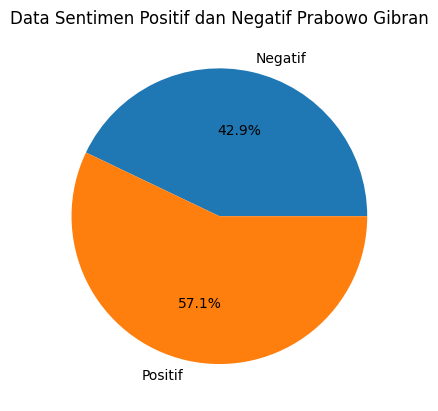

In [76]:
import numpy as np

sentimenno = [np.count_nonzero(dataset['sentimen'] == 'negatif'), np.count_nonzero(dataset['sentimen'] == 'positif')]
label = ['Negatif','Positif']
plt.title('Data Sentimen Positif dan Negatif Prabowo Gibran')
plt.pie(sentimenno, labels=label,radius=1, startangle=0, autopct='%.1f%%', shadow=False)
plt.show